In [0]:
# Import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# Create model grid
x = np.linspace(0,50,51)

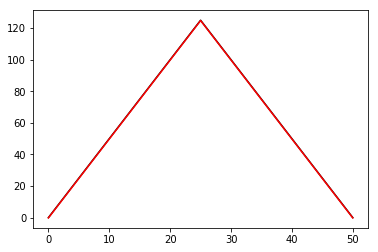

In [170]:
# Define initial elevation along hillslope
zi = np.zeros_like(x)
for i in np.arange(1,len(zi)):
    if i <= (len(zi)/2.):
        zi[i] = zi[i-1] + 5
    else:
        zi[i] = zi[i-1] - 5
        
#Define initial bedrock height along hillslope
# wi = np.zeros_like(x)
# for i in np.arange(1,len(wi)):
#     if i <= (len(wi)/2.):
#         wi[i] = wi[i-1] + 9.5
#     else:
#         wi[i] = wi[i-1] - 9.5
wi = zi - 0.2
        
# Plot initial elevation of model to make sure it looks good
plt.plot(x,zi,'k')
plt.plot(x,wi,'r')

In [0]:
def evolve(x,zi,wi,k,aw,bw,t,dt,u,bd):
    # Calculate dx
    dx = x[1]-x[0]
    # Create array so store elevation at each timestep
    z_out = np.zeros((int((t/dt)+1),len(x)))
    # Create array to store bedrockelevation at each timestep
    w_out = np.zeros((int((t/dt)+1),len(x)))
    # Store initial Elevation as timestep 0 in array
    z_out[0] = zi
    # Store initial bedrock Elevation as timestep 0 in array
    w_out[0] = wi
    # Create array of times at different timesteps
    ts = np.linspace(dt,t,t/dt)
    ts = np.concatenate(([0],ts))
    # Set Elevation at boundaries
    z_out[0,0] = zi[0]
    z_out[0,-1] = zi[0]
    # Set Bedrock Elevation at boundaries
    w_out[:,0] = wi[0]
    w_out[:,-1] = wi[0]
    # Print specifics of model
    print('Running a Model with k = '+str(k)+', time = '+str(t)+', and uplift ='+str(u))
    #Create loop to iterate through timesteps for diffusion
    for i in np.arange(1,len(ts)):
        # Create loop to iterate through model grid
        for l in np.arange(0,len(x)):
            th = z_out[i-1][l] - w_out[i-1][l]
            w_r = aw*np.exp(-bw*th)
            w_out[i][l] = w_out[i-1][l] - w_r*dt + u*dt   
        for l in np.arange(1,len(x)-1):
            q_l = k*((z_out[i-1][l-1]-z_out[i-1][l])/dx)
            q_r = k*((z_out[i-1][l+1]-z_out[i-1][l])/dx)
            z_out[i][l] = z_out[i-1][l] + q_r*dt + q_l*dt + u*dt
        for l in [0,len(x)-1]:
            z_out[i][l] = z_out[i-1][l] + bd*dt + u*dt
            w_out[i][l] = w_out[i-1][l] + u*dt
    return z_out,w_out

In [185]:
z_out,w_out = evolve(x,zi,wi,0.05,0.5,5,100000,1,0.01,-0.01)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  del sys.path[0]


Running a Model with k = 0.05, time = 100000, and uplift =0.01


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in exp


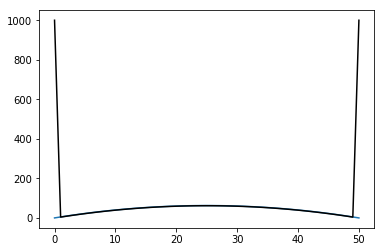

In [186]:
step = 100000
plt.plot(x,z_out[step])
plt.plot(x,w_out[step],'k')

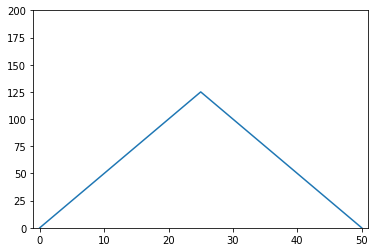

In [180]:
import matplotlib.animation as animation

from IPython.display import HTML
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( -1, len(x)))
ax.set_ylim((0,200))

line, = ax.plot(x, z_out[0])

In [0]:
# initialization function: plot the background of each frame
def init():
    line.set_ydata(z_out[0])
    return (line,)

In [0]:
# animation function. This is called sequentially
def animate(i):
    line.set_ydata(z_out[i])
    return (line,)

In [0]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100000, interval=50, blit=True)

In [0]:
HTML(anim.to_html5_video())